# Dimensionality Reduction with Linear Autoencoder 


## Goal 
Provide a simple visualisable feature dimension reduction (from 3D to 2D) example using linear autoencoder. 

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

#tf.debugging.set_log_device_placement(True) # apply this to check if CPU or GPUs are used during tensorflow computation

from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model


devices = tf.config.list_physical_devices()
print("Devices: ", devices)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


%matplotlib inline

Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]
Num GPUs Available:  0


## Data

In [2]:
data_train, data_test = make_blobs(n_samples=100, n_features=3, centers=2, random_state=1), make_blobs(n_samples=100, n_features=3, centers=2, random_state=2)
x_train, y_train = data_train[0], data_train[1]
x_test, y_test = data_test[0], data_test[1]

In [3]:
print(x_train[:10], y_train[:10]) # y_train is not used for training, but for verifying the dimension reduction results

[[ -1.99726964  -7.39138168  -9.49590389]
 [ -2.51907585   4.75703585 -11.30999591]
 [ -2.76017908   5.55121358  -9.09612178]
 [ -4.20198333  -7.02121319  -8.37954235]
 [ -1.14663009   4.10839703  -9.50919436]
 [ -2.62189143  -7.35219005  -7.47315826]
 [ -4.15218641  -7.76528069  -8.35662255]
 [ -2.16402577   4.56652694  -9.12154358]
 [ -2.61326051   4.14027136  -9.96509796]
 [ -2.34673261   3.56128423 -10.66895863]] [1 0 0 1 0 1 1 0 0 0]


Visualize the two class distributions in 3D feature space

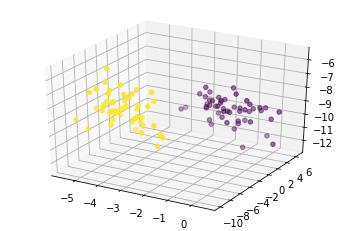

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0],x_train[:,1],x_train[:,2], c=y_train)


## Train Autoencoder

### Dimensions

In [5]:
n_inputs = 3
n_outputs = n_inputs

### Hyperparamters

In [6]:
learning_rate = 0.01
epochs = 500
n_latent = 2

### Build

In [7]:

latent_dim = 2

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
#          layers.Flatten(),
#          layers.Dense(latent_dim, activation='relu'),
          layers.Dense(latent_dim, activation=None),            
        ])
        self.decoder = tf.keras.Sequential([
        layers.Dense(n_outputs, activation=None),            
#          layers.Dense(n_outputs, activation='sigmoid'),

        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(n_latent)

autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

### Train 

In [12]:
tf.random.set_seed(1)
autoencoder.fit(x_train, x_train, epochs=epochs, shuffle=True, validation_data=(x_test, x_test), verbose=0)

## Results

In [13]:
encoded_data = autoencoder.encoder(x_test).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

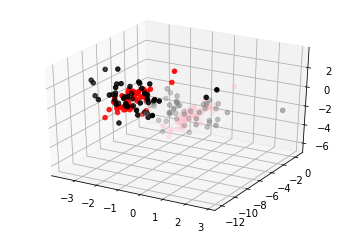

In [14]:
# Original
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = np.array(["black", "gray"])
ax.scatter(x_test[:,0],x_test[:,1],x_test[:,2], c=colors[y_test])    
colors = np.array(["red", "pink"])
ax.scatter(decoded_data[:,0],decoded_data[:,1],decoded_data[:,2], c=colors[y_test])


The decoded result seems separated by the two classes and similar to the original data distribution.

Let's look at the 2-D dimension reduction results

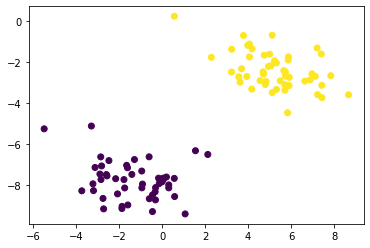

In [15]:
plt.scatter(encoded_data[:,0], encoded_data[:,1], c=y_test)

The result from the encoder are separated and provides reduced dimension from 3 to 2.  